# EDA for Finding Trends and Patterns

**Date created:  28 April 2023**<br>
**Last modified:  09 May 2023**<br>

### Author: Hank Hoang

## Import libraries

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
#Reading the data
df = pd.read_csv('data.csv')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690454 entries, 0 to 690453
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE OCC        690454 non-null  object 
 1   TIME OCC        690454 non-null  object 
 2   AREA            690454 non-null  int64  
 3   AREA NAME       690454 non-null  object 
 4   Rpt Dist No     690454 non-null  int64  
 5   Part 1-2        690454 non-null  int64  
 6   Crm Cd          690454 non-null  int64  
 7   Crm Cd Desc     690454 non-null  object 
 8   Mocodes         595482 non-null  object 
 9   Vict Age        690454 non-null  int64  
 10  Vict Sex        599971 non-null  object 
 11  Vict Descent    599965 non-null  object 
 12  Premis Cd       690446 non-null  float64
 13  Premis Desc     690092 non-null  object 
 14  Weapon Used Cd  239966 non-null  float64
 15  Weapon Desc     239966 non-null  object 
 16  Status          690454 non-null  object 
 17  Status Des

In [59]:
df.head()

,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LAT,LON
0,01/08/2020,22:30,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,34.0141,-118.2978
1,01/01/2020,03:30,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,34.0459,-118.2545
2,02/13/2020,12:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726.0,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,34.0448,-118.2474
3,01/01/2020,17:30,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,34.1685,-118.4019
4,01/01/2020,04:15,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,34.2198,-118.4468


In [60]:
#The rows are sorted by the values in the 'DATE OCC' column in ascending order, and the index is reset to start from 0
df_sorted = df.sort_values(by='DATE OCC').reset_index(drop=True)

In [61]:
#Convert DATE OCC column into the date time type
df_sorted['DATE OCC'] = pd.to_datetime(df_sorted['DATE OCC'])
df_sorted['Month'] = df_sorted['DATE OCC'].dt.strftime('%m/%Y')

In [62]:
# subset data for year 2020,2021,2022,2023
df_2020 = df_sorted[df_sorted['DATE OCC'].dt.year.isin([2020])]
df_2021 = df_sorted[df_sorted['DATE OCC'].dt.year.isin([2021])]
df_2022 = df_sorted[df_sorted['DATE OCC'].dt.year.isin([2022])]
df_2023 = df_sorted[df_sorted['DATE OCC'].dt.year.isin([2023])]

In [63]:
# Showing the criminal occurrences via day
df_2020['DATE OCC'].value_counts().sort_index()

2020-01-01    1070
2020-01-02     526
2020-01-03     593
2020-01-04     539
2020-01-05     505
              ... 
2020-12-27     448
2020-12-28     468
2020-12-29     457
2020-12-30     511
2020-12-31     573
Name: DATE OCC, Length: 366, dtype: int64

## Visualizing the criminal occurrences via day from 2020 to 2023


In [64]:
#Saving the dataframe for visualization each year
plot_d1=df_2020['DATE OCC'].value_counts().sort_index()
plot_d2=df_2021['DATE OCC'].value_counts().sort_index()
plot_d3=df_2022['DATE OCC'].value_counts().sort_index()
plot_d4=df_2023['DATE OCC'].value_counts().sort_index()

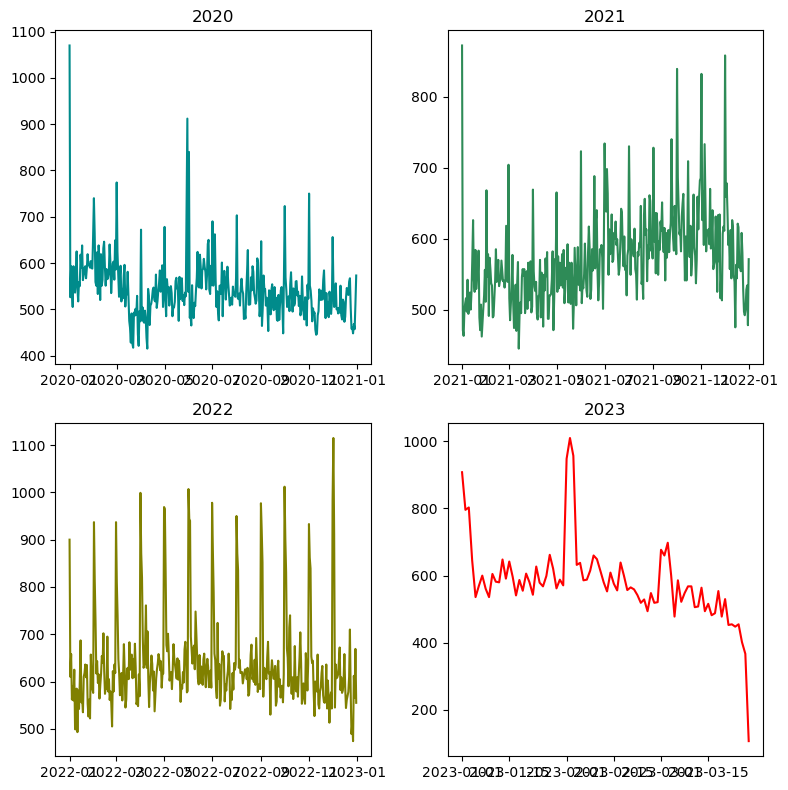

In [65]:
# create grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(8,8))


# create first subplot
axs[0, 0].plot(plot_d1.index, plot_d1.values,color='darkcyan')
axs[0, 0].set_title('2020')

# create second subplot
axs[0, 1].plot(plot_d2.index, plot_d2.values,color='seagreen')
axs[0, 1].set_title('2021')

# create third subplot
axs[1, 0].plot(plot_d3.index, plot_d3.values,color='olive')
axs[1, 0].set_title('2022')

# create fourth subplot
axs[1, 1].plot(plot_d4.index, plot_d4.values,color='red')
axs[1, 1].set_title('2023')

# adjust spacing between subplots
plt.tight_layout()


# Display the graph
plt.show()


In [66]:
# Merging four dataframes together
df1 = plot_d1.reset_index(name='Occurrence')
df2 = plot_d2.reset_index(name='Occurrence')
df3 = plot_d3.reset_index(name='Occurrence')
df4 = plot_d4.reset_index(name='Occurrence')

day_df = pd.concat([df1, df2, df3,df4])
day_df.head()

,index,Occurrence
0,2020-01-01,1070
1,2020-01-02,526
2,2020-01-03,593
3,2020-01-04,539
4,2020-01-05,505


In [67]:
# rename column 'col2' to 'new_col'
day_df = day_df.rename(columns={'index': 'Day'})
day_df.head()

,Day,Occurrence
0,2020-01-01,1070
1,2020-01-02,526
2,2020-01-03,593
3,2020-01-04,539
4,2020-01-05,505


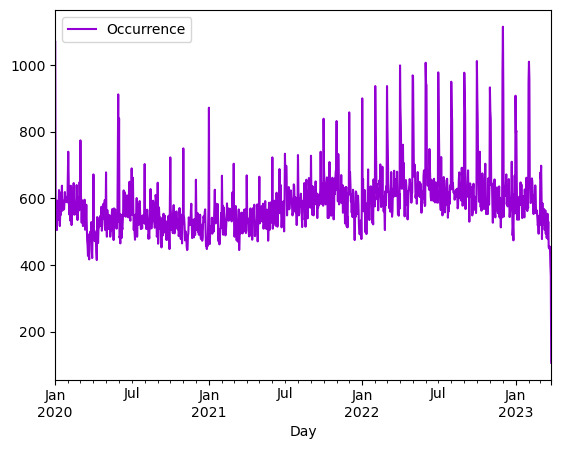

In [81]:
# Create line plot
day_df.plot(x='Day', y='Occurrence', kind='line',color='darkviolet')

# Display plot
plt.show()

In [69]:
 day_df[day_df['Occurrence'] > 800]

,Day,Occurrence
0,2020-01-01,1070
150,2020-05-30,912
152,2020-06-01,840
0,2021-01-01,872
273,2021-10-01,839
304,2021-11-01,832
334,2021-12-01,858
0,2022-01-01,900
31,2022-02-01,937
32,2022-02-02,812


* The fluctuation range of the number of crimes tends to increase from 2020 to 2022.
* The massive amount of criminal activities happened in the first couple days of every month (from the 1st to the 3rd of a month), with more than 800 cases. An exception was the day 2020-05-30 with 912 cases.

In [70]:
#Saving data for performing the next steps
day_df.to_csv('day_time_series.csv', index=False)

## Visualizing crime trends in 2020,2021,2022,2023 by months

In [71]:
# Showing the number of criminal activities each month from 2020 to 2023
plot1=df_2020['Month'].value_counts().sort_index()
plot2=df_2021['Month'].value_counts().sort_index()
plot3=df_2022['Month'].value_counts().sort_index()
plot4=df_2023['Month'].value_counts().sort_index()
print(plot1,plot2,plot3,plot4)

01/2020    18430
02/2020    17237
03/2020    16136
04/2020    15651
05/2020    17174
06/2020    16989
07/2020    17077
08/2020    16833
09/2020    15599
10/2020    16464
11/2020    15545
12/2020    15922
Name: Month, dtype: int64 01/2021    16469
02/2021    15387
03/2021    16278
04/2021    16020
05/2021    16939
06/2021    17115
07/2021    18611
08/2021    18334
09/2021    18304
10/2021    19257
11/2021    18292
12/2021    17882
Name: Month, dtype: int64 01/2022    18340
02/2022    17615
03/2022    19622
04/2022    19654
05/2022    20317
06/2022    20073
07/2022    19814
08/2022    19905
09/2022    19105
10/2022    20025
11/2022    18415
12/2022    19558
Name: Month, dtype: int64 01/2023    18989
02/2023    17364
03/2023    13713
Name: Month, dtype: int64


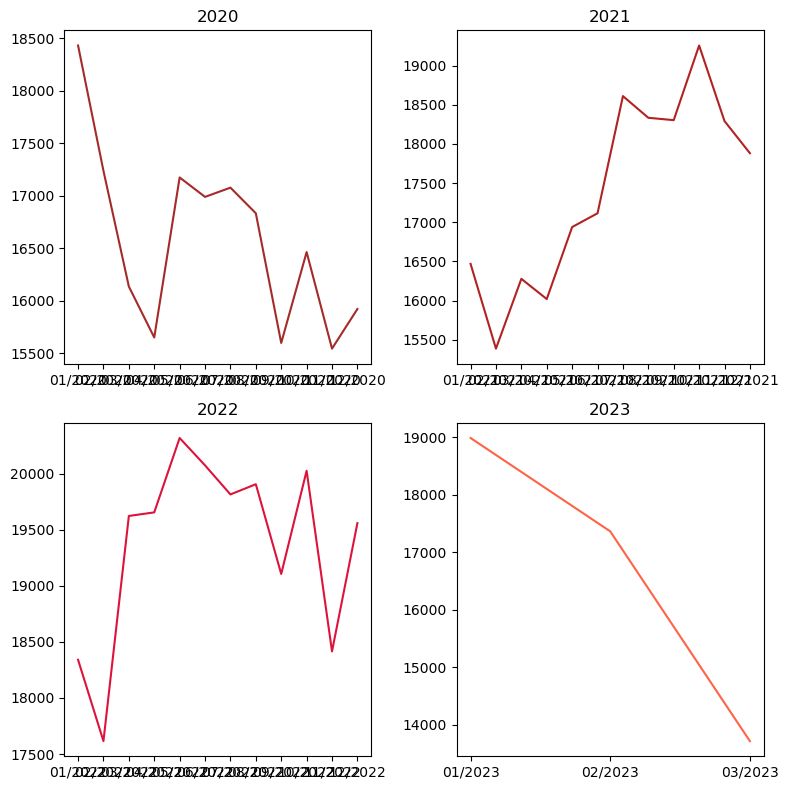

In [72]:
# create grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(8,8))


# create first subplot
axs[0, 0].plot(plot1.index, plot1.values,color='brown')
axs[0, 0].set_title('2020')

# create second subplot
axs[0, 1].plot(plot2.index, plot2.values,color='firebrick')
axs[0, 1].set_title('2021')

# create third subplot
axs[1, 0].plot(plot3.index, plot3.values,color='crimson')
axs[1, 0].set_title('2022')

# create fourth subplot
axs[1, 1].plot(plot4.index, plot4.values,color='tomato')
axs[1, 1].set_title('2023')

# adjust spacing between subplots
plt.tight_layout()

# Display the graph
plt.show()


There are inconsistent crime trends throughout the three years.

In [73]:
# Merging four dataframes together
df1 = plot1.reset_index(name='Occurrence')
df2 = plot2.reset_index(name='Occurrence')
df3 = plot3.reset_index(name='Occurrence')
df4 = plot4.reset_index(name='Occurrence')

month_df = pd.concat([df1, df2, df3,df4])
month_df.head()

,index,Occurrence
0,01/2020,18430
1,02/2020,17237
2,03/2020,16136
3,04/2020,15651
4,05/2020,17174


In [74]:
# Rename column 'col2' to 'new_col'
month_df = month_df.rename(columns={'index': 'Month'})
month_df.head()

,Month,Occurrence
0,01/2020,18430
1,02/2020,17237
2,03/2020,16136
3,04/2020,15651
4,05/2020,17174


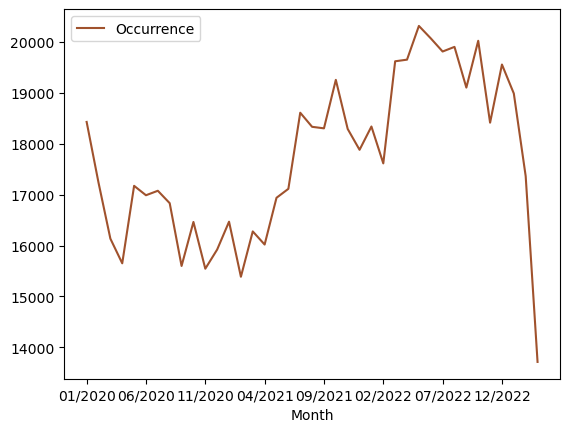

In [83]:
# Create line plot
month_df.plot(x='Month', y='Occurrence', kind='line',color='sienna')

# Display plot
plt.show()


There is plenty of fluctuations via months throughout three years. It appeared random, so predicting the number of criminal activities by month could be challenging. 

In [76]:
#Saving data for performing the next steps
month_df.to_csv('month_series.csv', index=False)